In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

**Attribute Information:**
For more information, read [Cho et al, 2020].  
1. station - used weather station number: 1 to 25  
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')  
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6  
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9  
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5  
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100  
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5  
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6  
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9  
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4  
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97  
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97  
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98  
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97  
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7  
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6  
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8  
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7  
19. lat - Latitude (Â°): 37.456 to 37.645  
20. lon - Longitude (Â°): 126.826 to 127.135  
21. DEM - Elevation (m): 12.4 to 212.3  
22. Slope - Slope (Â°): 0.1 to 5.2  
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9  
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9  
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.  


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 2nd\temperature.csv') 
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head(14)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


# Exploratory Data analysis (EDA)

In [5]:
# checking the dimensions of the dataset
df.shape

(7752, 25)

the dataset contains 7752 rows and 25 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 24 are independent variables(features,input variables)

In [6]:
# checking the column of the dataset and we are storeing it in the list

df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar_radiation',
 'Next_Tmax',
 'Next_Tmin']

In [7]:
# checking the data types of the columns

df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar_radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# checking the null values

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar_radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

there are null values present in all columns except lat,lon,DEM,Slope,Solar radiation

<AxesSubplot:>

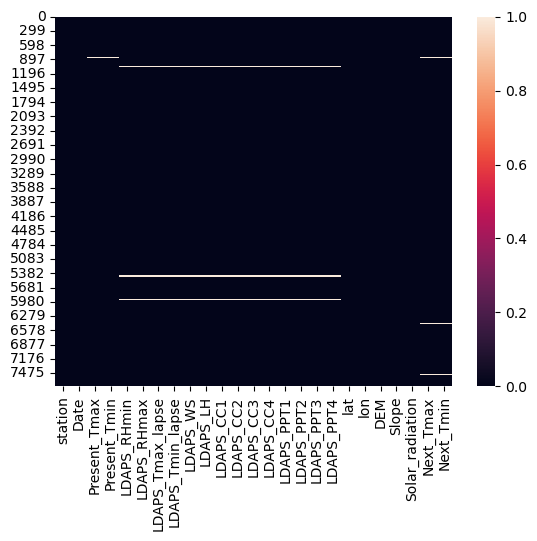

In [9]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

on seeing the graph we find null values are present

# checking duplicates

In [10]:
df.duplicated().sum()

0

there are no duplicate values present in any columns

# Description of Dataset

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


The counts of all the columns are not same which means there are missing values in the dataset. and in some columns mean is less or more than median which means skewness is present

In [12]:
# take the mean to replace nan in continous data
station_mean = df['station'].mean()
Present_Tmax_mean= df['Present_Tmax'].mean()
Present_Tmin_mean=df['Present_Tmin'].mean()
LDAPS_RHmin_mean=df['LDAPS_RHmin'].mean()
LDAPS_RHmax_mean=df['LDAPS_RHmax'].mean()
LDAPS_Tmax_lapse_mean=df["LDAPS_Tmax_lapse"].mean()
LDAPS_Tmin_lapse_mean=df["LDAPS_Tmin_lapse"].mean()
LDAPS_WS_mean=df["LDAPS_WS"].mean()            
LDAPS_LH_mean=df["LDAPS_LH"].mean()            
LDAPS_CC1_mean=df["LDAPS_CC1"].mean()           
LDAPS_CC2_mean=df["LDAPS_CC2"].mean()           
LDAPS_CC3_mean=df["LDAPS_CC3"].mean()           
LDAPS_CC4_mean=df["LDAPS_CC4"].mean()           
LDAPS_PPT1_mean=df["LDAPS_PPT1"].mean()          
LDAPS_PPT2_mean=df["LDAPS_PPT2"].mean()          
LDAPS_PPT3_mean=df["LDAPS_PPT3"].mean()          
LDAPS_PPT4_mean=df["LDAPS_PPT4"].mean()          
Next_Tmax_mean=df["Next_Tmax"].mean()           
Next_Tmin_mean=df["Next_Tmin"].mean()           

In [13]:
# Replace NaN values with the mean
df['station'].fillna(station_mean, inplace=True)
df['Present_Tmax'].fillna(Present_Tmax_mean, inplace=True)
df['Present_Tmin'].fillna(Present_Tmin_mean, inplace=True)
df['LDAPS_RHmin'].fillna(LDAPS_RHmin_mean, inplace=True)
df['LDAPS_RHmax'].fillna(LDAPS_RHmax_mean, inplace=True)
df["LDAPS_Tmax_lapse"].fillna(LDAPS_Tmax_lapse_mean,inplace=True)
df["LDAPS_Tmin_lapse"].fillna(LDAPS_Tmin_lapse_mean,inplace=True)
df["LDAPS_WS"].fillna(LDAPS_WS_mean,inplace=True)
df["LDAPS_LH"].fillna(LDAPS_LH_mean,inplace=True) 
df["LDAPS_CC1"].fillna(LDAPS_CC1_mean,inplace=True)
df["LDAPS_CC2"].fillna(LDAPS_CC2_mean,inplace=True)
df["LDAPS_CC3"].fillna(LDAPS_CC3_mean,inplace=True)
df["LDAPS_CC4"].fillna(LDAPS_CC4_mean,inplace=True)
df["LDAPS_PPT1"].fillna(LDAPS_PPT1_mean,inplace=True)
df["LDAPS_PPT2"].fillna(LDAPS_PPT2_mean,inplace=True)
df["LDAPS_PPT3"].fillna(LDAPS_PPT3_mean,inplace=True)
df["LDAPS_PPT4"].fillna(LDAPS_PPT4_mean,inplace=True) 
df["Next_Tmax"].fillna(Next_Tmax_mean,inplace=True)          
df["Next_Tmin"].fillna(Next_Tmin_mean,inplace=True)           

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [15]:
df.drop(["Date",'LDAPS_LH'],axis=1,inplace=True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,0.233947,0.203896,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,0.225508,0.251771,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,0.209344,0.257469,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,0.216372,0.226002,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,0.151407,0.249995,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,0.030034,0.081035,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,0.035874,0.074962,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,0.048954,0.059869,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# checking correlation

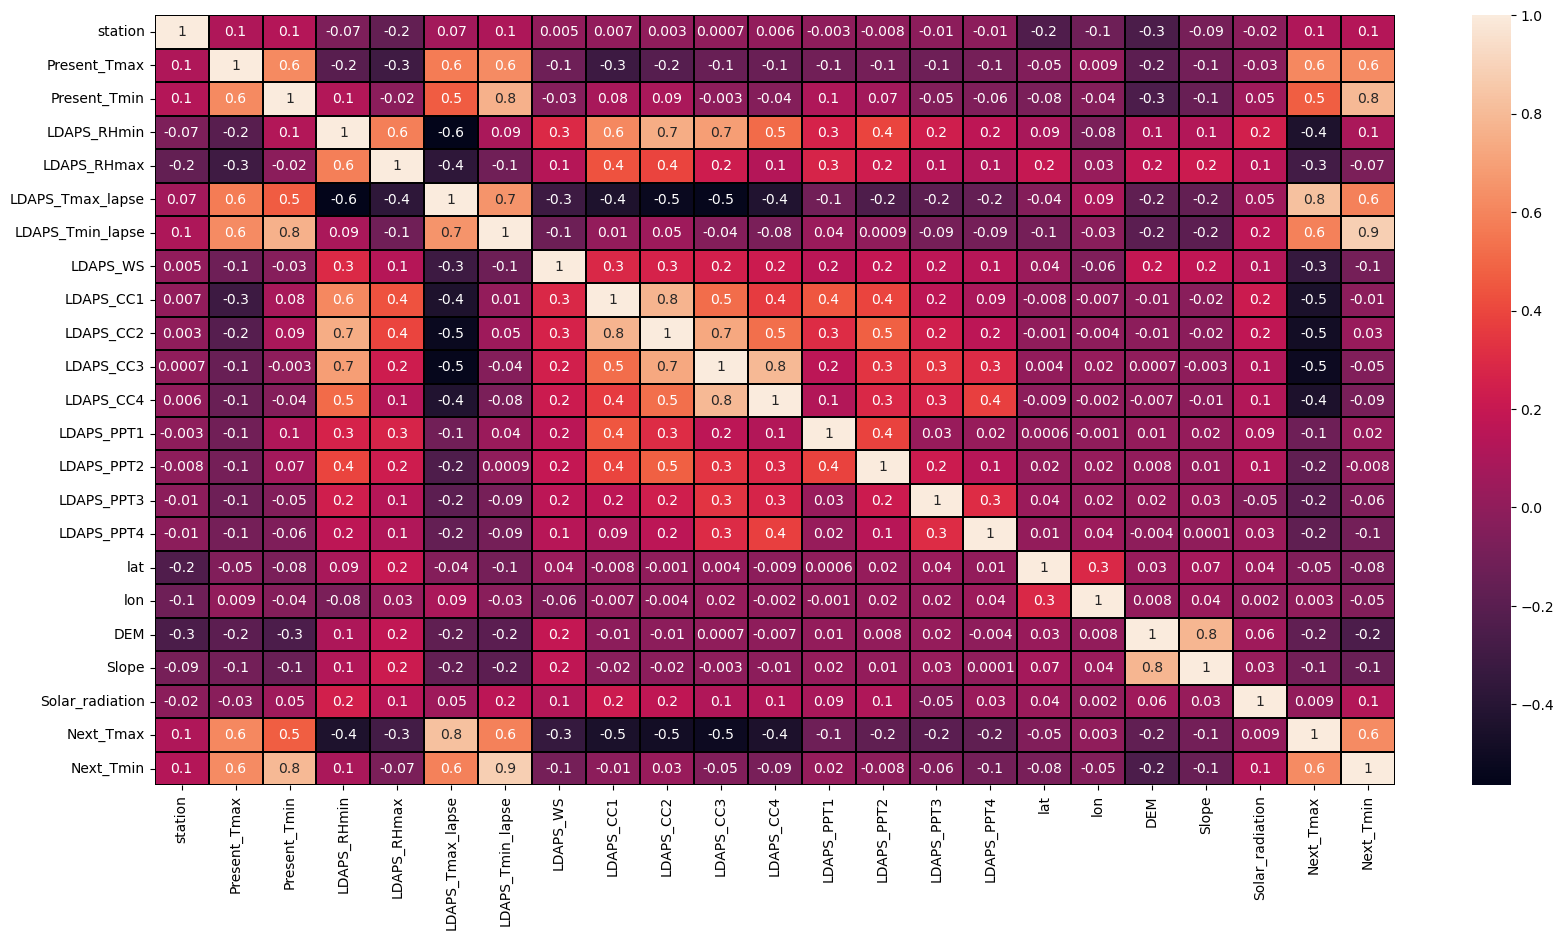

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True)
plt.yticks(rotation=0)
plt.show()

there is high correlation between LDAPS_Tmin_lapse andpresent_tmin,next_tmin and present_tmin,LDAPS_CC2,_cc3 and LDAPS_RHMIN,LDAPS_Tmin_lapse and next_tmax, next_tmin and ldaps_tmin_ldaps

# visualizing the correlation between label and features using bar plot

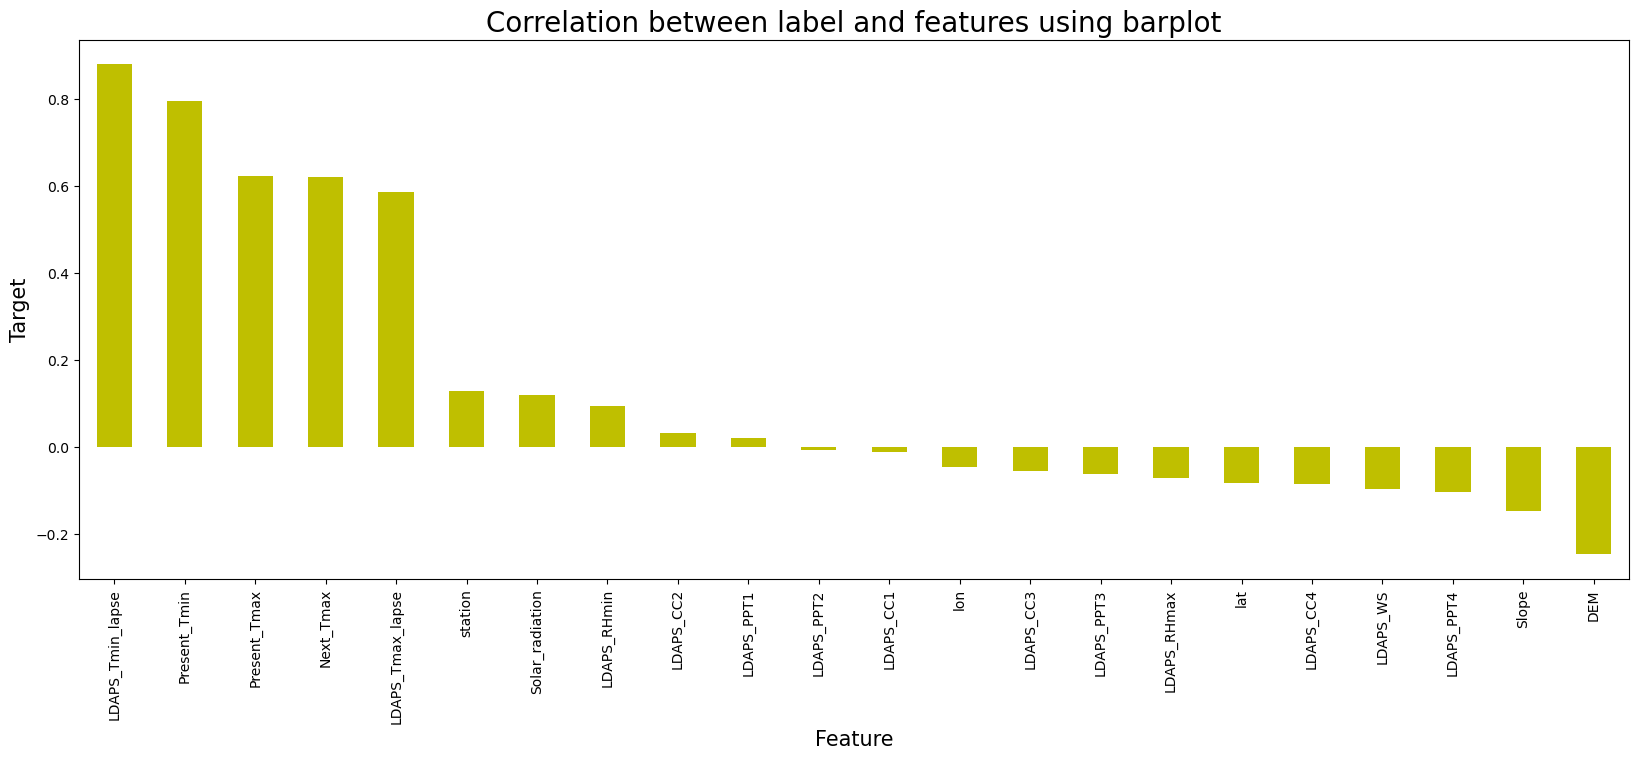

In [17]:
plt.figure(figsize=(20,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

Feature ;DAPS_CC2,LDAPS_PPT1,LDAPS_PPT2,LDAPSCC1 have almost zero (no correlation) with the target

# checking data distribution

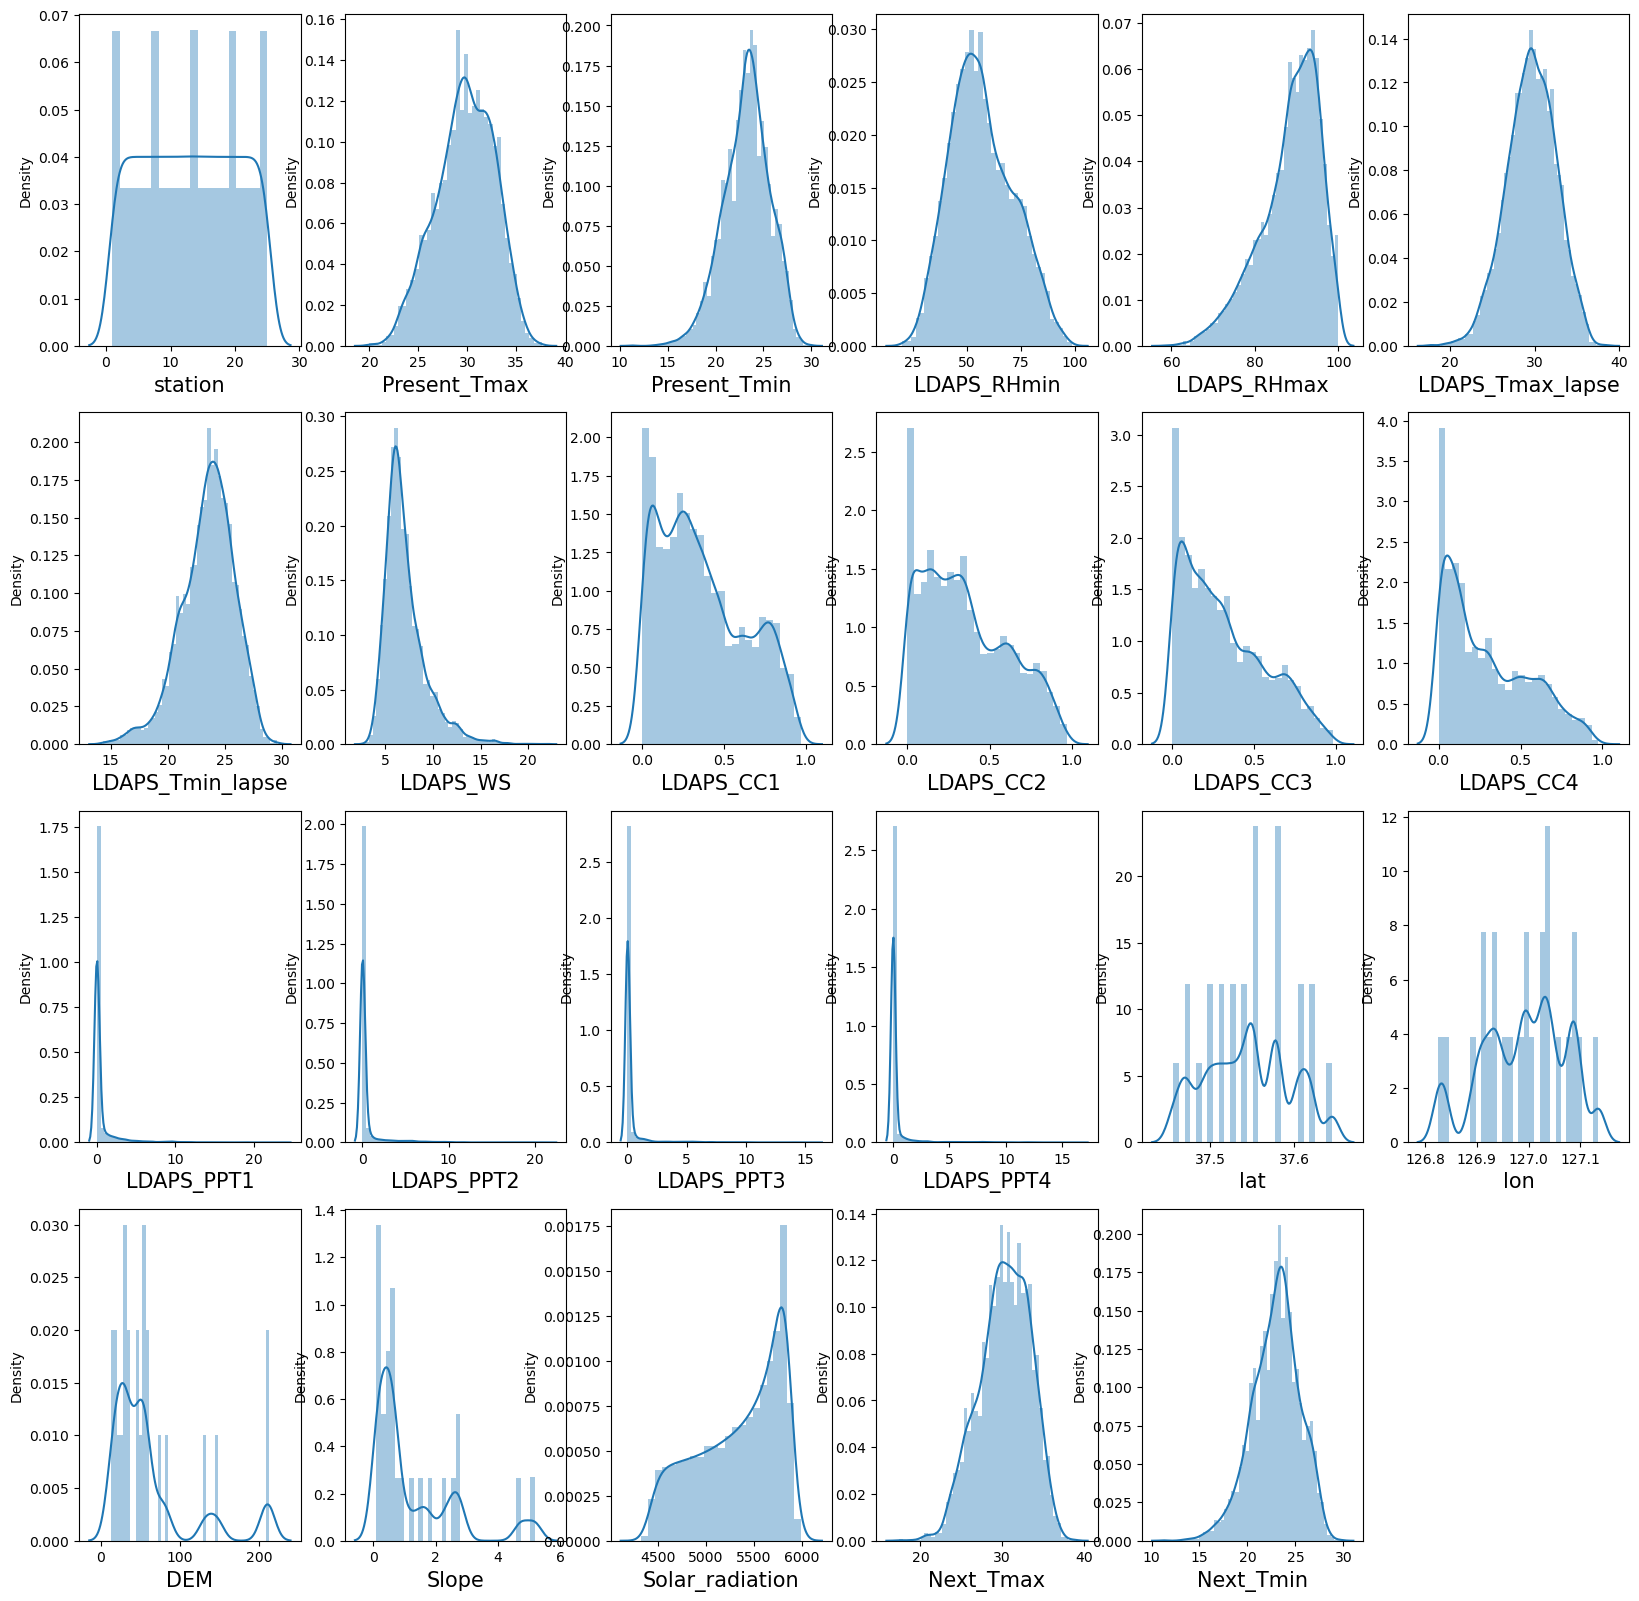

In [18]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=30:
            plt.subplot(5,6,plot)
            sns.distplot(df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show() 

there is skewness present in many features

In [19]:
# checking value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.759372    75
77.030350     2
98.524734     2
19.794666     2
51.810596     2
             ..
52.924568     1
60.215191     1
46.799820     1
52.227486     1
22.933014     1
Name: LDAPS_RHmin, Length: 7673, dtype: int64


88.374804     75
96.525200      2
99.251968      2
100.000153     2
94.795967      2
 

# Checking for Outliers

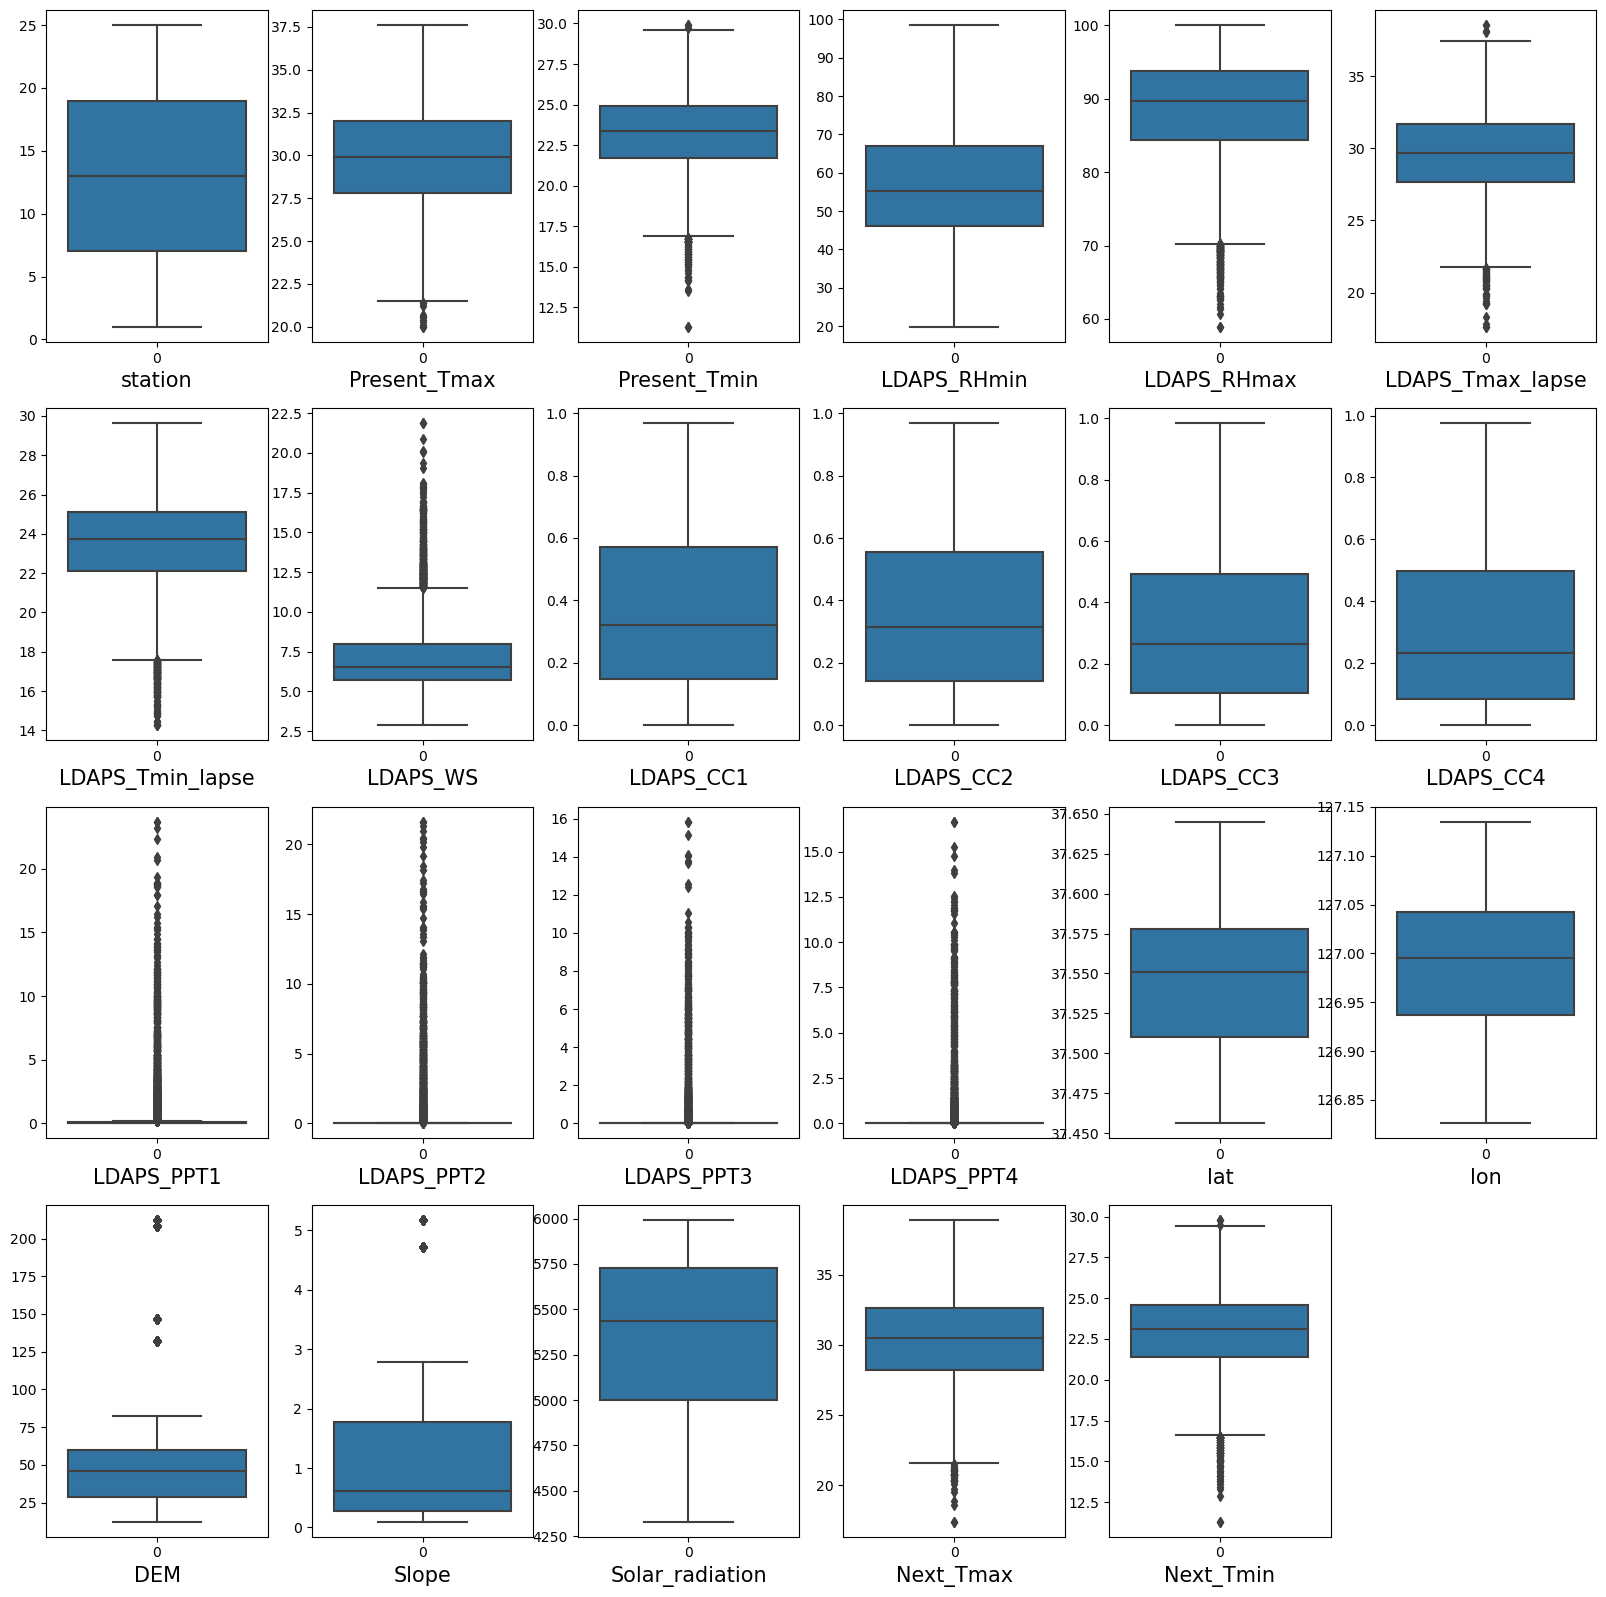

In [20]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=30:
            plt.subplot(5,6,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

outliers are present

# removing outliers

In [21]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(7752, 23)

In [22]:
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 13, 13, ..., 13, 14, 15], dtype=int64))


In [23]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(7752, 23)
(6919, 23)


In [24]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

10.74561403508772


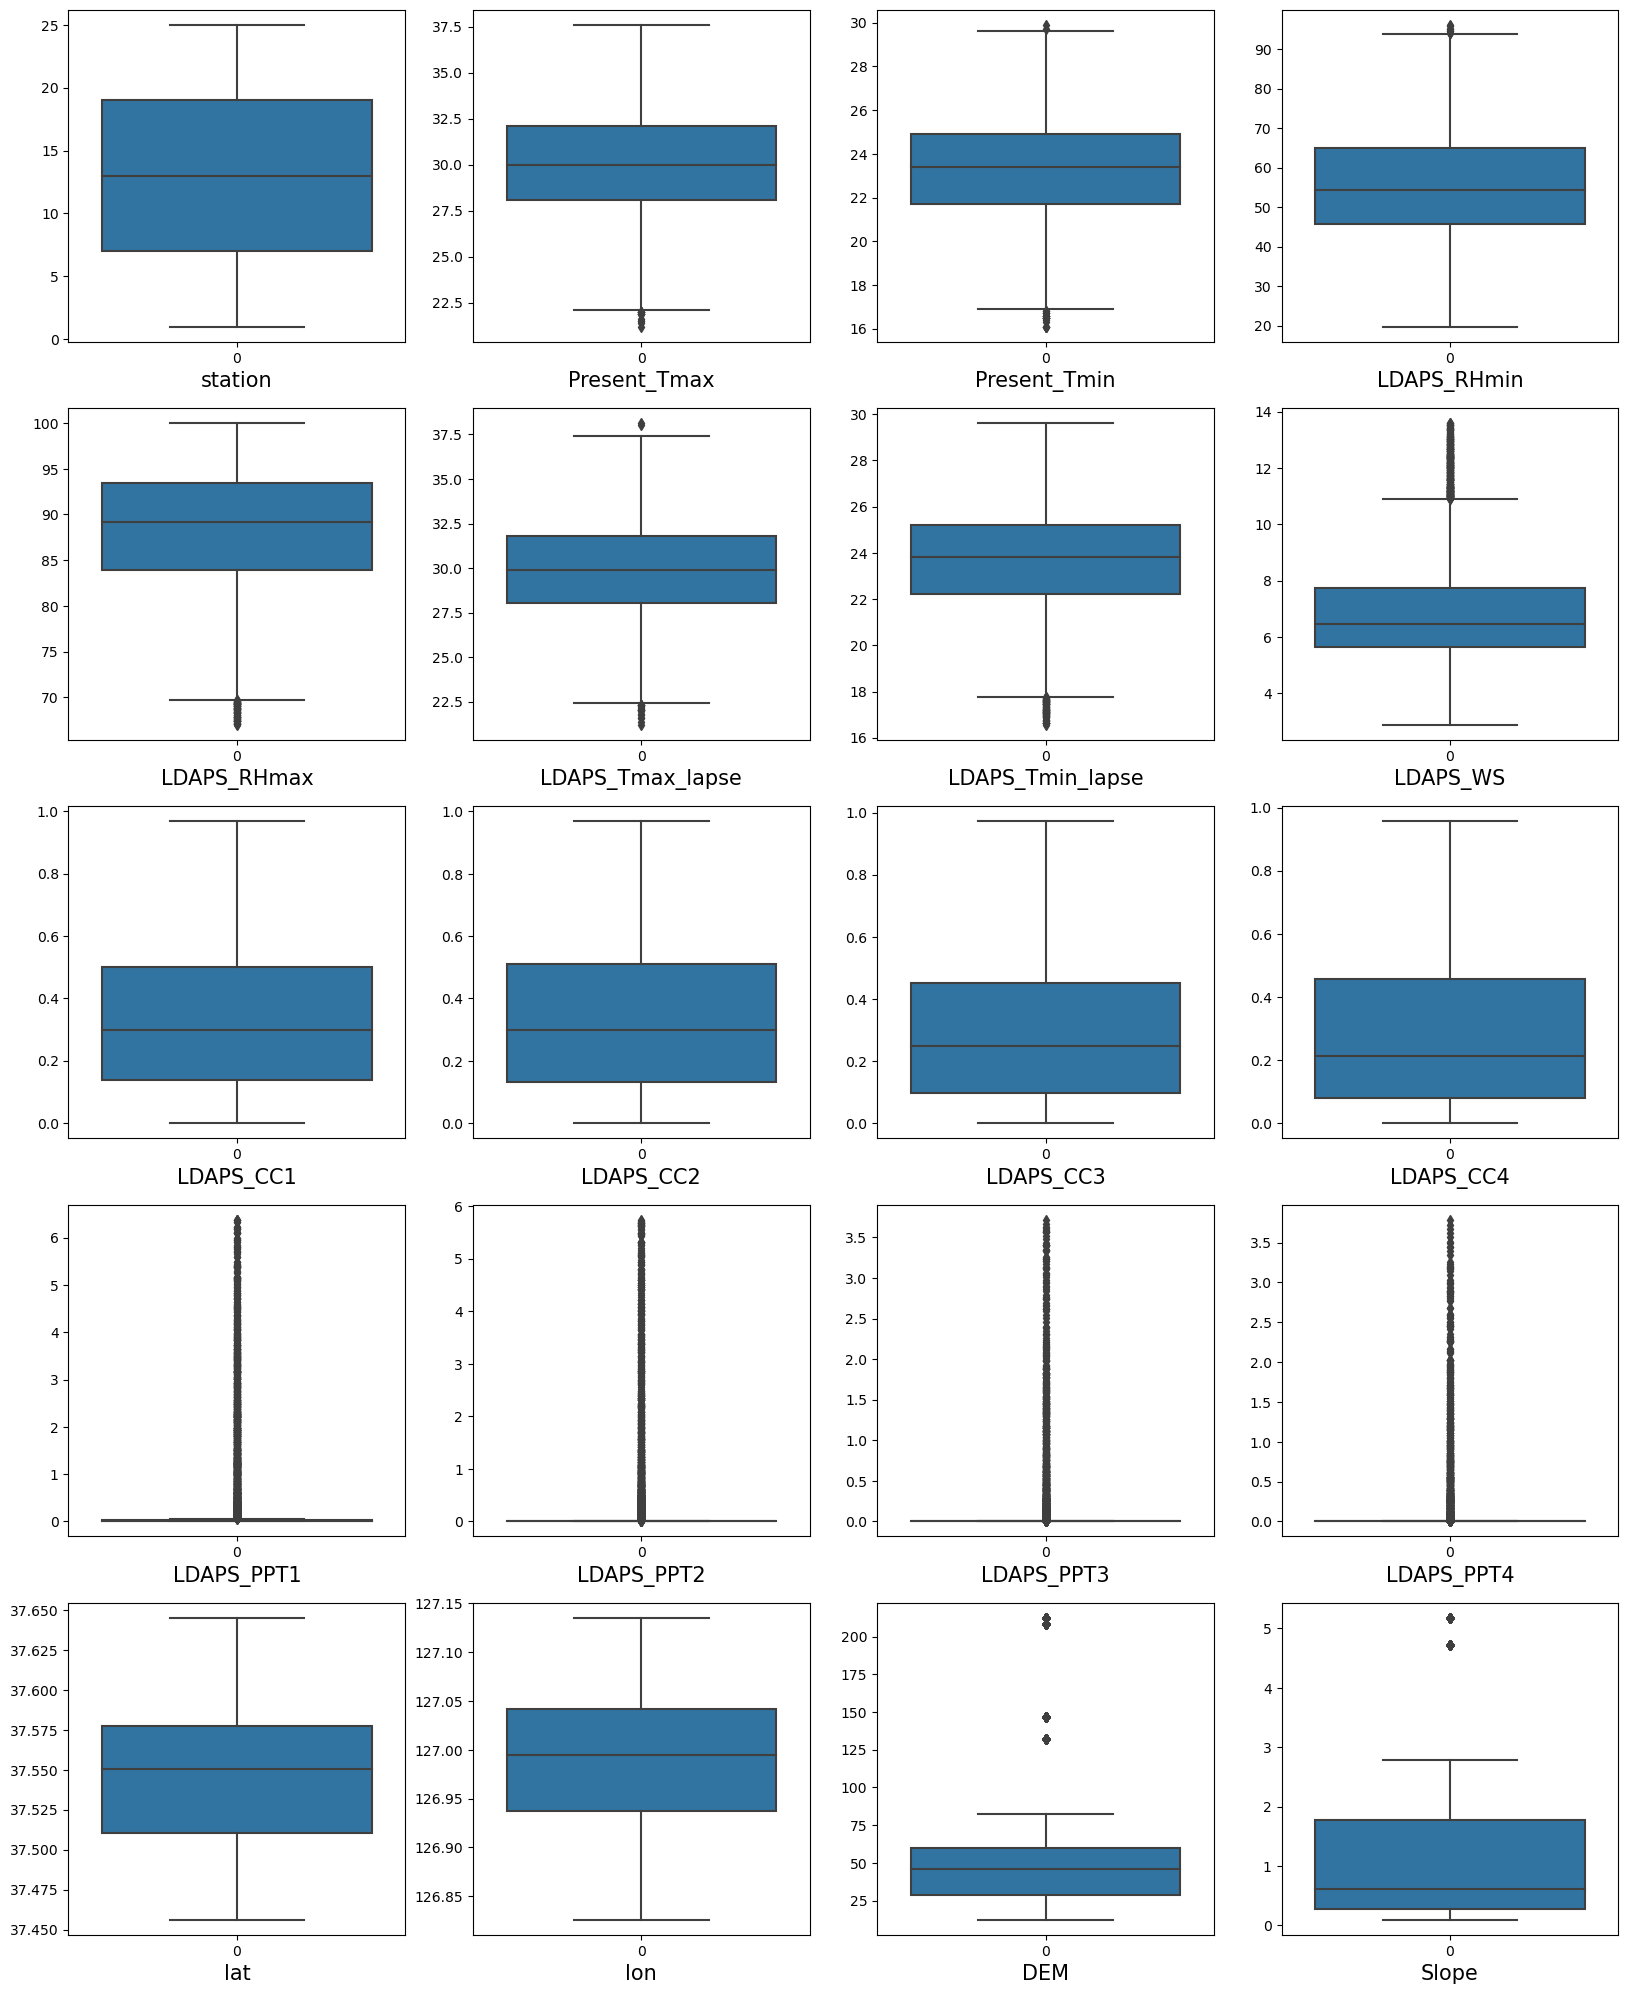

In [25]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=20:
        ac=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

outliers are removed

In [26]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
count,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,...,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000,6919.000000
mean,13.022258,29.943513,23.312242,55.576424,88.099183,29.887922,23.649554,6.868207,0.345267,0.330913,...,0.209844,0.104803,0.087887,37.544083,126.990786,60.959729,1.235545,5341.548369,30.569081,23.085851
std,7.196500,2.854740,2.306000,13.822815,6.910391,2.735387,2.216871,1.839673,0.250434,0.239632,...,0.739907,0.395411,0.360978,0.049978,0.079925,53.449699,1.349983,420.097450,2.932914,2.356030
min,1.000000,21.200000,16.100000,19.794666,66.989464,21.195428,16.558304,2.882580,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570,21.100000,15.500000
25%,7.000000,28.100000,21.700000,45.691879,83.937473,28.028547,22.225506,5.628966,0.138331,0.133451,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5018.759766,28.600000,21.500000
50%,13.000000,30.000000,23.400000,54.278030,89.191154,29.908069,23.839580,6.462105,0.297931,0.297314,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5428.761230,30.800000,23.200000
75%,19.000000,32.100000,24.900000,65.007298,93.406456,31.814801,25.194263,7.734042,0.500745,0.510971,...,0.006014,0.002251,0.000000,37.577600,127.042000,59.832400,1.767800,5719.192871,32.800000,24.700000
max,25.000000,37.600000,29.900000,96.169815,99.999008,38.140534,29.619342,13.589191,0.967277,0.968353,...,5.743190,3.720154,3.789353,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


# checking distribution again

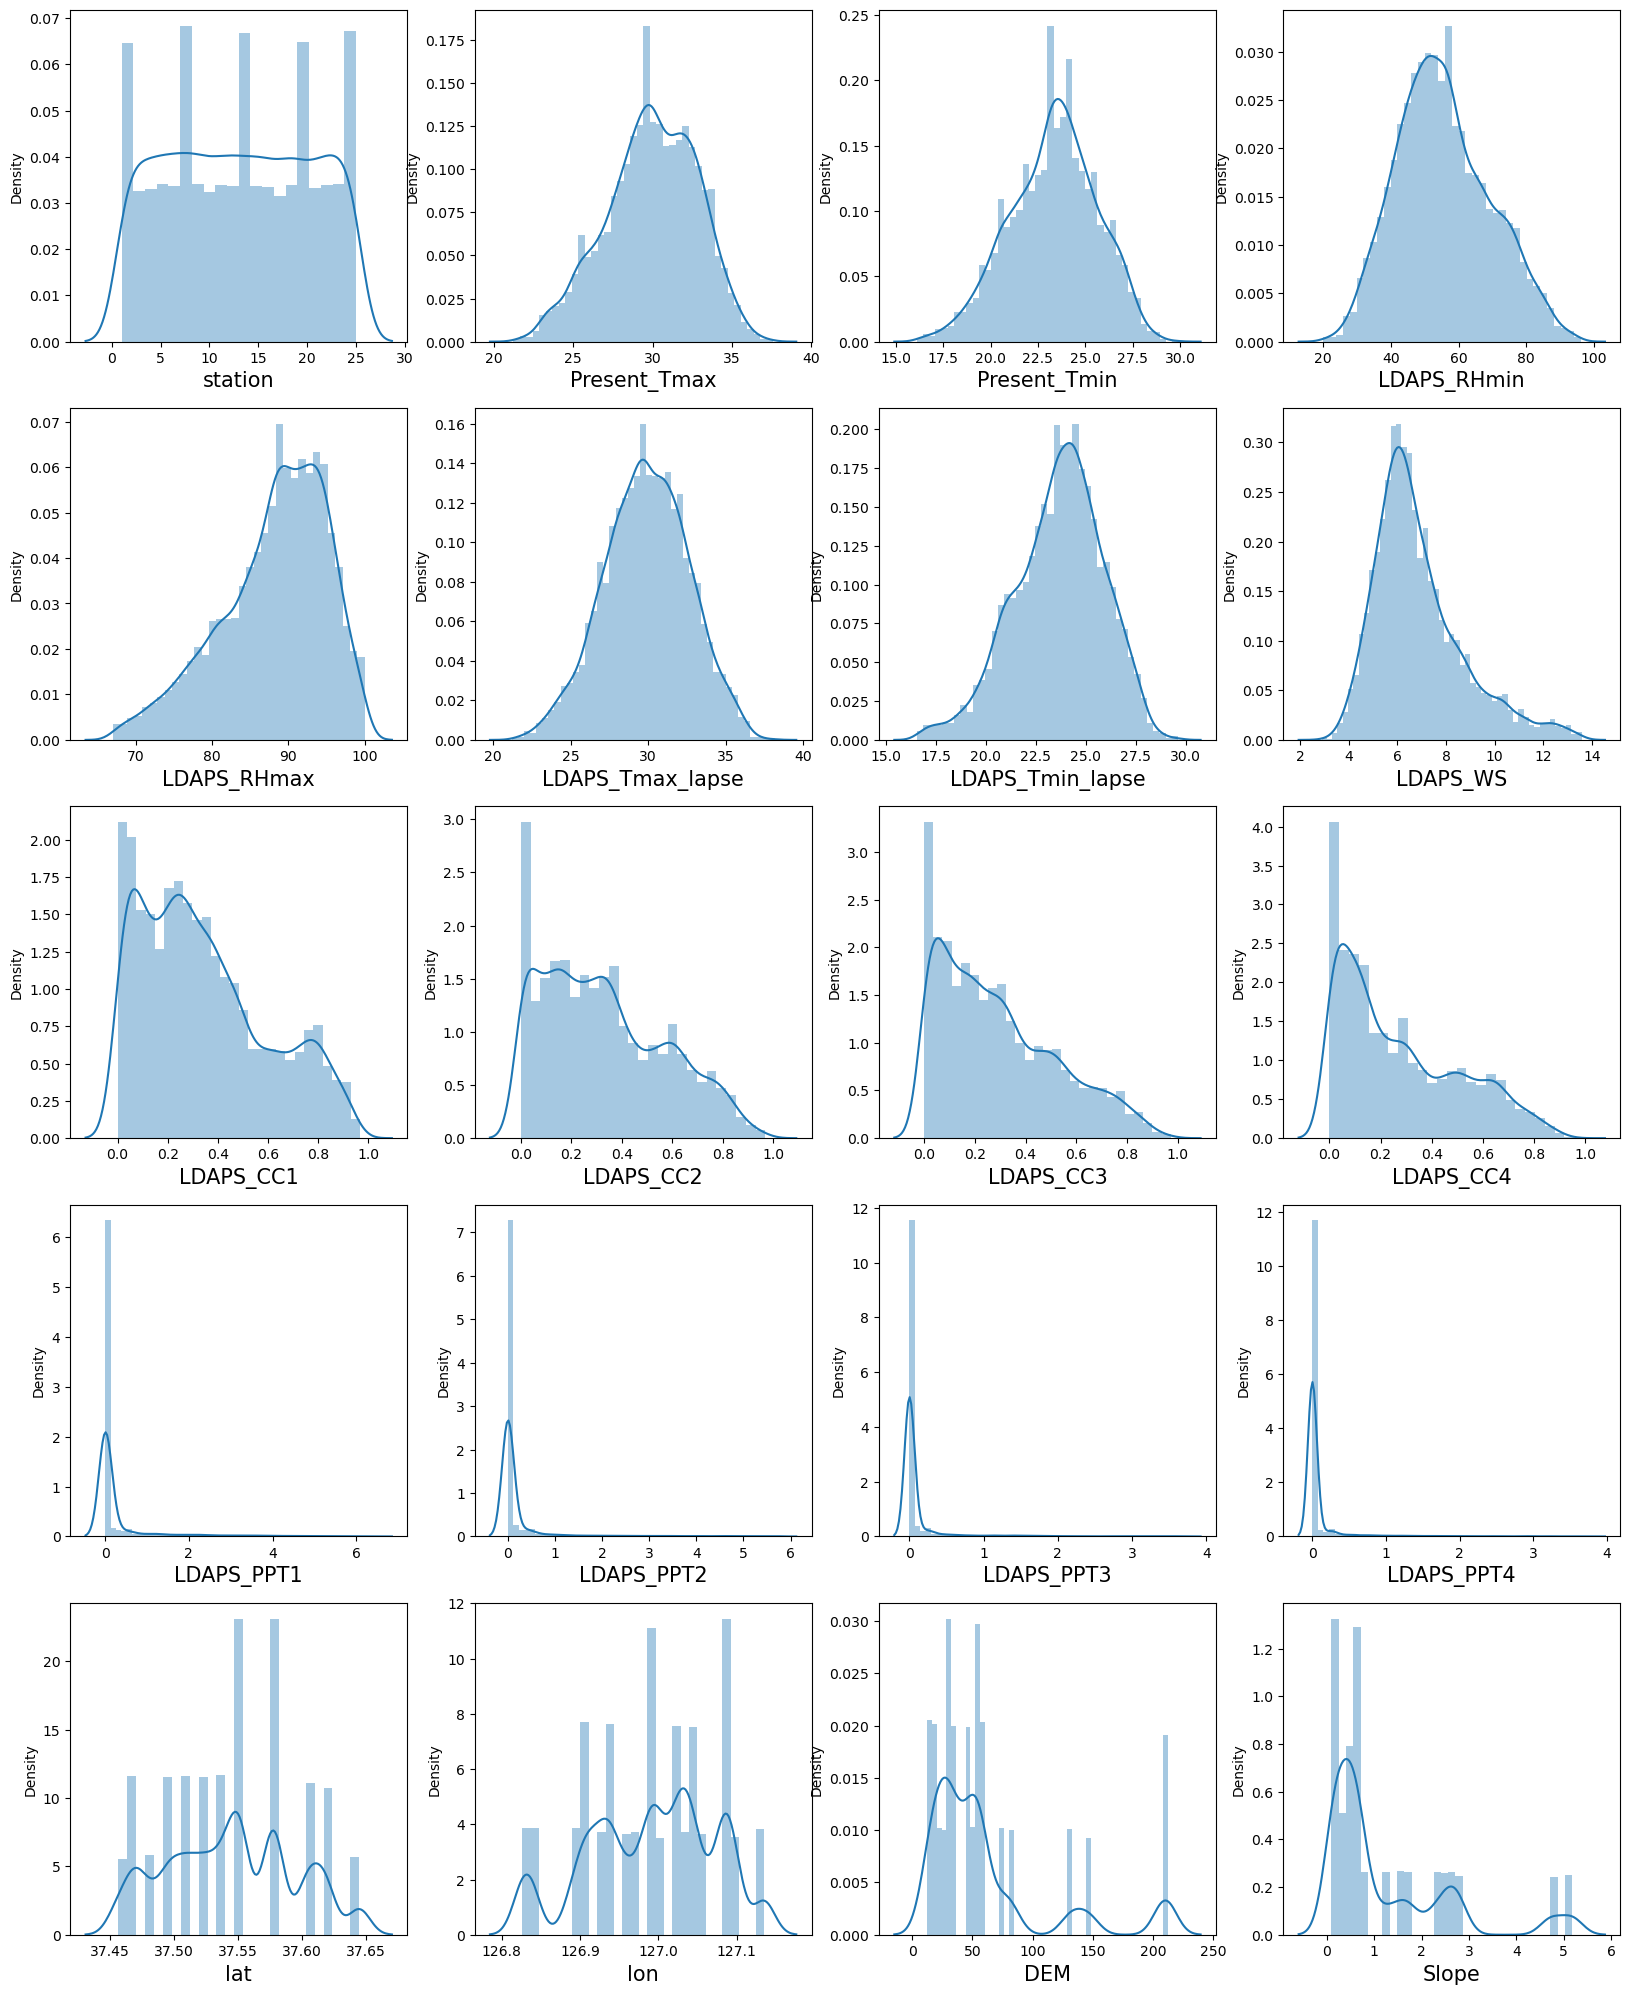

In [27]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=20:
        ac=plt.subplot(5,4,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

# checking skewness

In [28]:
df1.skew()

station             0.006202
Present_Tmax       -0.275317
Present_Tmin       -0.224717
LDAPS_RHmin         0.308134
LDAPS_RHmax        -0.688719
LDAPS_Tmax_lapse   -0.111201
LDAPS_Tmin_lapse   -0.385648
LDAPS_WS            1.085297
LDAPS_CC1           0.594111
LDAPS_CC2           0.504622
LDAPS_CC3           0.703750
LDAPS_CC4           0.713091
LDAPS_PPT1          3.738557
LDAPS_PPT2          4.853339
LDAPS_PPT3          5.493270
LDAPS_PPT4          5.935590
lat                 0.104196
lon                -0.275386
DEM                 1.766818
Slope               1.595908
Solar_radiation    -0.507802
Next_Tmax          -0.271211
Next_Tmin          -0.233990
dtype: float64

there are skewness

# Removing skewness

In [29]:
import numpy as np

for i in df1.columns:
    if i not in ["Next_Tmin"]:
        if df1[i].skew()<0.5 and df1[i].skew()> -0.5:
            continue
        elif df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.sqrt(df1[i])

In [30]:
df1.skew()

station             0.006202
Present_Tmax       -0.275317
Present_Tmin       -0.224717
LDAPS_RHmin         0.308134
LDAPS_RHmax        -0.779741
LDAPS_Tmax_lapse   -0.111201
LDAPS_Tmin_lapse   -0.385648
LDAPS_WS            0.732685
LDAPS_CC1          -0.176507
LDAPS_CC2          -0.293699
LDAPS_CC3          -0.097793
LDAPS_CC4           0.006076
LDAPS_PPT1          2.398471
LDAPS_PPT2          3.032519
LDAPS_PPT3          3.262861
LDAPS_PPT4          3.590890
lat                 0.104196
lon                -0.275386
DEM                 1.173973
Slope               0.884245
Solar_radiation    -0.556815
Next_Tmax          -0.271211
Next_Tmin          -0.233990
dtype: float64

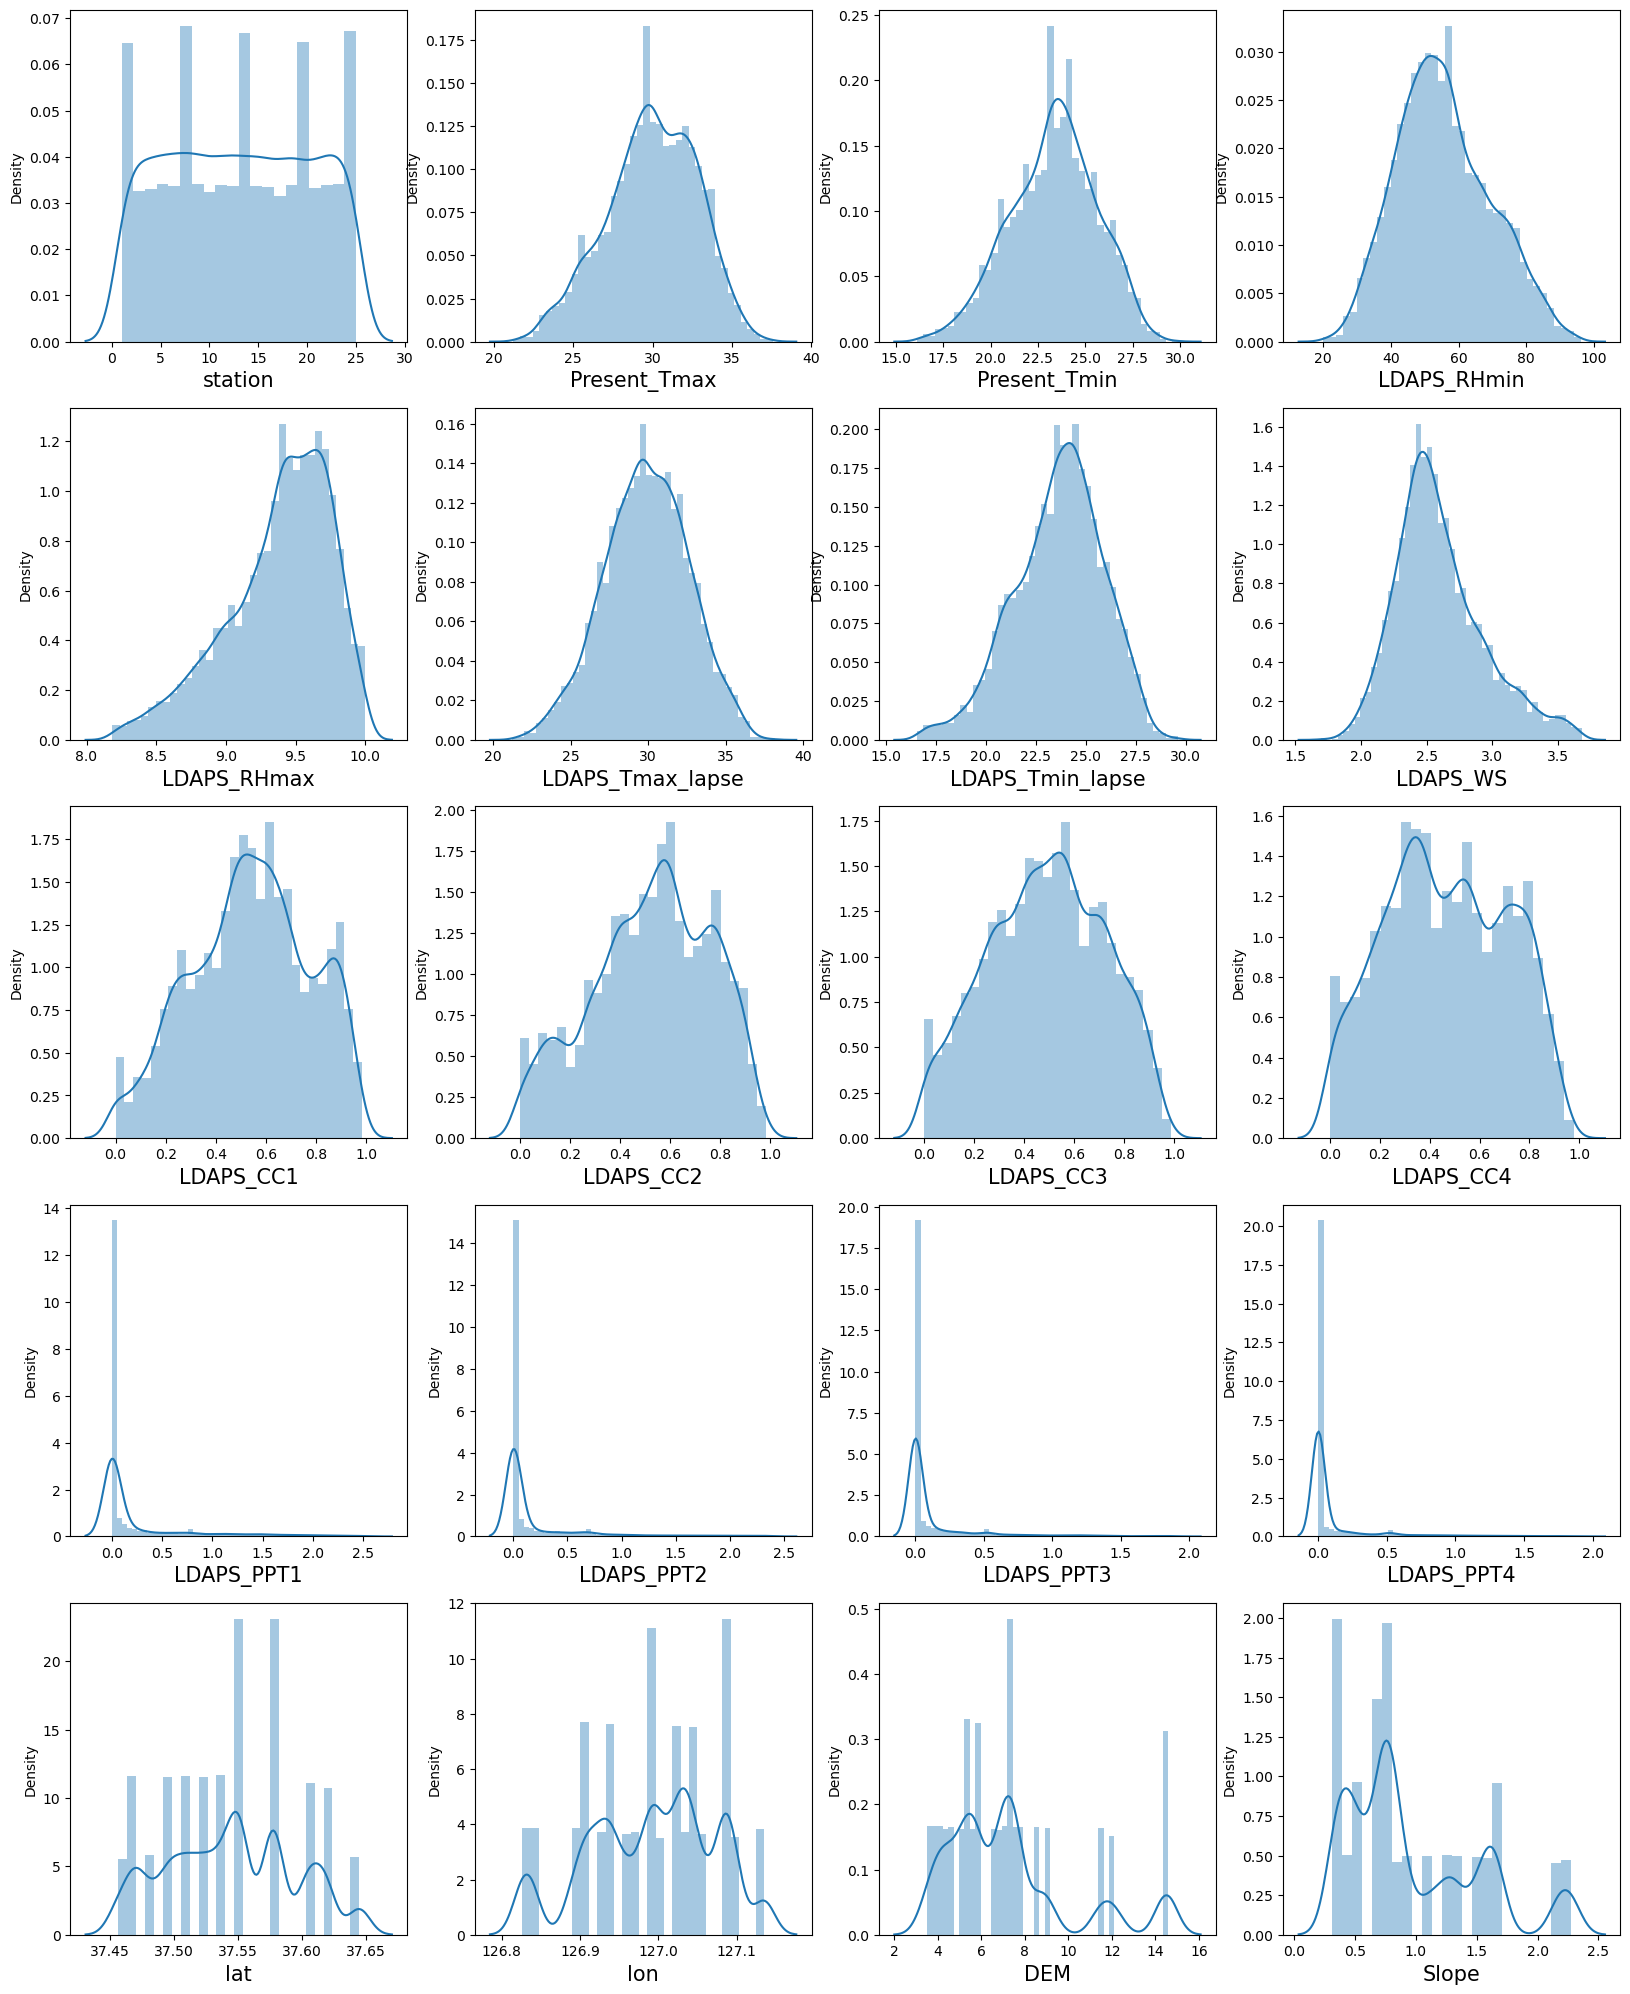

In [31]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=20:
        ac=plt.subplot(5,4,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

# seperating features and label

In [32]:
x=df1.drop("Next_Tmin",axis=1)
y=df1["Next_Tmin"]

# Feature Scaling using Standard Scalarization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax
0,-1.670691,-0.435627,-0.829306,0.193843,0.445968,-0.663143,-0.289897,0.036494,-0.236209,-0.308478,...,-0.47521,-0.420009,-0.401126,-0.359349,1.210944,0.002675,2.501101,1.286361,1.508267,-0.500931
1,-1.531724,0.685396,-0.742570,-0.239695,0.374225,-0.013613,0.173886,-0.633441,-0.273825,-0.095992,...,-0.47521,-0.420009,-0.401126,-0.359349,1.210944,0.515692,-0.185924,-0.464570,1.232335,-0.023555
2,-1.392758,0.580300,-0.005309,-0.498194,-0.574597,0.074353,0.413261,-0.360825,-0.347894,-0.072102,...,-0.47521,-0.420009,-0.401126,-0.359349,0.670671,0.841020,-0.499338,-0.834612,1.219411,0.181034
3,-1.253791,0.720428,0.038059,0.192693,1.186766,-0.067013,-0.145881,-0.659536,-0.315350,-0.207571,...,-0.47521,-0.420009,-0.401126,-0.359349,2.019352,0.390566,-0.161755,1.145219,1.204607,0.385624
4,-1.114825,0.510236,-0.612465,0.043241,0.311016,-0.282974,-0.073566,-0.606652,-0.640264,-0.103494,...,-0.47521,-0.420009,-0.401126,-0.359349,0.132399,1.804491,-0.448849,-0.475648,1.210420,0.215132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,1.108639,-2.397419,-2.390564,-2.234687,-1.422435,-0.758713,-2.411925,-0.087138,-1.320044,-1.484111,...,-0.47521,-0.420009,-0.401126,-0.359349,0.132399,0.615793,-0.718577,-0.392155,-2.157825,-1.012405
6915,1.247605,-2.607611,-2.564037,-1.843576,-0.615993,-1.163728,-2.632511,-0.586166,-1.201286,-1.556498,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.678010,1.191373,-0.869028,-1.112169,-2.194486,-0.876012
6916,1.386572,-2.327355,-2.694142,-2.086203,-1.330681,-1.292722,-2.198697,-0.354417,-1.562300,-1.014568,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.137737,-1.248587,-1.120900,-1.058376,-2.190589,-0.773717
6917,1.525538,-2.327355,-2.433932,-2.281595,-1.568899,-1.052113,-2.217716,-0.122148,-1.493512,-1.060577,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.407874,-1.023360,-1.049070,-0.916218,-2.203337,-0.671422


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.234308,station
1,2.589821,Present_Tmax
2,3.004692,Present_Tmin
3,5.825657,LDAPS_RHmin
4,2.054485,LDAPS_RHmax
5,8.122472,LDAPS_Tmax_lapse
6,6.655142,LDAPS_Tmin_lapse
7,1.251255,LDAPS_WS
8,3.992644,LDAPS_CC1
9,4.638530,LDAPS_CC2


there is no multicollinearity found

# finding the best random state

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [36]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)

 Maximum r2 score is 0.8457683701952335 on random_state 20


# creating train test split

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Modelling

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.8457683701952335
R2_score on training Data: 83.12348511852406
Mean absolute error: 0.7418849776985503
Mean squared error: 0.8742549161280767
Root Mean absolute error: 0.9350159977925921


In [40]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.9035696512513263
R2_score on training Data: 98.56088943551414
Mean absolute error: 0.5679887335615543
Mean squared error: 0.5466110068614959
Root Mean absolute error: 0.7393314594020032


In [41]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.8664689883179875
R2_score on training Data: 91.54527532236354
Mean absolute error: 0.6620800730805447
Mean squared error: 0.7569144122144739
Root Mean absolute error: 0.8700082828424531


In [42]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.8901777835125085
R2_score on training Data: 90.42586910219643
Mean absolute error: 0.6210952884672094
Mean squared error: 0.6225221946095529
Root Mean absolute error: 0.7890007570399111


In [43]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.7795913484812211
R2_score on training Data: 100.0
Mean absolute error: 0.8298683427801784
Mean squared error: 1.2493763269659577
Root Mean absolute error: 1.1177550388908823


In [44]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: 0.5894819222578692
R2_score on training Data: 57.5175492805969
Mean absolute error: 1.2178868890873056
Mean squared error: 2.3270028857233425
Root Mean absolute error: 1.5254516989152238


In [45]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.8457692237329807
R2_score on training Data: 83.12347569534788
Mean absolute error: 0.7418804182810207
Mean squared error: 0.8742500778885244
Root Mean absolute error: 0.935013410539402


In [46]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: 0.9086021928005852
R2_score on training Data: 92.42188033381414
Mean absolute error: 0.558502110733511
Mean squared error: 0.5180842760240681
Root Mean absolute error: 0.7197807138455907


In [47]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.9124365456208503
R2_score on training Data: 100.0
Mean absolute error: 0.5382353891289572
Mean squared error: 0.4963494230141527
Root Mean absolute error: 0.7045207044609496


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.74050311 0.68224638 0.8028021  0.85320656 0.85844203]
0.7874400364166381
Difference between R2 score and cross validation score is 5.832833377859547


In [50]:
score1=cross_val_score(rfr,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score1.mean())*100)

[0.73503713 0.69861679 0.81280979 0.85138669 0.8512228 ]
0.7898146420480687
Difference between R2 score and cross validation score is 11.375500920325754


In [51]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.50444936 0.52849582 0.66450617 0.71213785 0.77192437]
0.6363027122577762
Difference between R2 score and cross validation score is 23.016627606021125


In [52]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.74435007 0.70490212 0.82714298 0.85881578 0.87119551]
0.8012812904672281
Difference between R2 score and cross validation score is 8.889649304528046


In [53]:
score4=cross_val_score(dtr,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score4.mean())*100)

[0.47295324 0.49077295 0.61814613 0.71320204 0.66582143]
0.5921791567136572
Difference between R2 score and cross validation score is 18.741219176756395


In [54]:
score5=cross_val_score(Lasso,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score5.mean())*100)

[0.54310447 0.39491363 0.56352348 0.45787038 0.6269709 ]
0.5172765710764072
Difference between R2 score and cross validation score is 7.2205351181461985


In [55]:
score6=cross_val_score(rd,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score6.mean())*100)

[0.74051395 0.68230415 0.8027763  0.85322823 0.85845009]
0.7874545450932249
Difference between R2 score and cross validation score is 5.831467863975581


In [56]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.68821703 0.66819053 0.77723521 0.81339962 0.83776215]
0.7569609112245469
Difference between R2 score and cross validation score is 15.164128157603828


In [57]:
score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.73637182 0.70042466 0.81407847 0.85478769 0.86660648]
0.794453823302291
Difference between R2 score and cross validation score is 11.798272231855933


ExtratreesRegressor is our best model

# hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5,None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}
gscv=GridSearchCV(ExtraTreesRegressor(),param_grid=params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [3, 5, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]})

In [60]:
gscv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [61]:
final_model=ExtraTreesRegressor(      max_depth=None,
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      n_estimators= 200 )
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.7944470661411442
Mean absolute error: 2.558525138374198
Mean squared error: 10.171740850377866
Root Mean absolute error: 3.1893166745210273


In [62]:
import pickle
file="Temp_min.pkl"
pickle.dump(final_model,open(file,'wb'))

In [63]:
import pickle
model=pickle.load(open("Temp_min.pkl",'rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

91.26830493741102


In [64]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted next day min temp","Original next day min temp"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075
Predicted next day min temp,25.7095,22.356,26.006,21.265661,20.8305,24.577,22.6255,25.954,22.488,18.726,...,20.773983,18.0175,24.590111,20.9555,25.721,27.41,20.786,22.806,23.595,25.8805
Original next day min temp,26.7000,22.800,25.900,21.200000,20.3000,24.900,24.1000,25.500,21.700,17.500,...,21.000000,18.9000,25.300000,20.3000,25.500,27.60,20.900,22.500,23.200,26.7000


# for next day max Temp

In [65]:
x=df1.drop("Next_Tmax",axis=1)
y=df1["Next_Tmax"]

# Feature Scaling using Standard Scalarization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmin
0,-1.670691,-0.435627,-0.829306,0.193843,0.445968,-0.663143,-0.289897,0.036494,-0.236209,-0.308478,...,-0.47521,-0.420009,-0.401126,-0.359349,1.210944,0.002675,2.501101,1.286361,1.508267,-0.800494
1,-1.531724,0.685396,-0.742570,-0.239695,0.374225,-0.013613,0.173886,-0.633441,-0.273825,-0.095992,...,-0.47521,-0.420009,-0.401126,-0.359349,1.210944,0.515692,-0.185924,-0.464570,1.232335,-0.248678
2,-1.392758,0.580300,-0.005309,-0.498194,-0.574597,0.074353,0.413261,-0.360825,-0.347894,-0.072102,...,-0.47521,-0.420009,-0.401126,-0.359349,0.670671,0.841020,-0.499338,-0.834612,1.219411,0.345585
3,-1.253791,0.720428,0.038059,0.192693,1.186766,-0.067013,-0.145881,-0.659536,-0.315350,-0.207571,...,-0.47521,-0.420009,-0.401126,-0.359349,2.019352,0.390566,-0.161755,1.145219,1.204607,0.515374
4,-1.114825,0.510236,-0.612465,0.043241,0.311016,-0.282974,-0.073566,-0.606652,-0.640264,-0.103494,...,-0.47521,-0.420009,-0.401126,-0.359349,0.132399,1.804491,-0.448849,-0.475648,1.210420,-0.248678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,1.108639,-2.397419,-2.390564,-2.234687,-1.422435,-0.758713,-2.411925,-0.087138,-1.320044,-1.484111,...,-0.47521,-0.420009,-0.401126,-0.359349,0.132399,0.615793,-0.718577,-0.392155,-2.157825,-2.286151
6915,1.247605,-2.607611,-2.564037,-1.843576,-0.615993,-1.163728,-2.632511,-0.586166,-1.201286,-1.556498,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.678010,1.191373,-0.869028,-1.112169,-2.194486,-2.540835
6916,1.386572,-2.327355,-2.694142,-2.086203,-1.330681,-1.292722,-2.198697,-0.354417,-1.562300,-1.014568,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.137737,-1.248587,-1.120900,-1.058376,-2.190589,-2.116362
6917,1.525538,-2.327355,-2.433932,-2.281595,-1.568899,-1.052113,-2.217716,-0.122148,-1.493512,-1.060577,...,-0.47521,-0.420009,-0.401126,-0.359349,-0.407874,-1.023360,-1.049070,-0.916218,-2.203337,-1.819230


# Checking variance inflation factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.228289,station
1,2.475209,Present_Tmax
2,3.287240,Present_Tmin
3,5.848982,LDAPS_RHmin
4,2.056464,LDAPS_RHmax
5,6.811681,LDAPS_Tmax_lapse
6,8.083713,LDAPS_Tmin_lapse
7,1.227643,LDAPS_WS
8,3.993057,LDAPS_CC1
9,4.631096,LDAPS_CC2


no multicollinearity

# finding the best random state

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [69]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)

 Maximum r2 score is 0.7887294306600675 on random_state 24


# creating train test split

In [70]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [72]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.9136369503594488
R2_score on training Data: 100.0
Mean absolute error: 0.6503982194411704
Mean squared error: 0.7598686512171581
Root Mean absolute error: 0.8717044517594011


ExtratreesRegressor is our best mode

In [73]:
final_model=ExtraTreesRegressor()
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.7217548194642178
Mean absolute error: 3.1360806112895423
Mean squared error: 15.14892674399735
Root Mean absolute error: 3.8921622196405625


In [74]:
import pickle
file="Temp_max.pkl"
pickle.dump(final_model,open(file,'wb'))

In [75]:
import pickle
model=pickle.load(open("Temp_max.pkl",'rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

91.32590434566895


In [76]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted next day max temp","Original next day max temp"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075
Predicted next day max temp,33.55,32.357,29.467,27.076,32.388,33.868,31.512749,27.131,28.174749,29.314,...,32.907,34.756,33.935,31.907,35.297,33.975,31.302,26.253493,28.096,31.023749
Original next day max temp,33.40,32.700,30.200,26.100,31.900,33.000,33.200000,26.700,28.300000,29.800,...,33.000,35.200,32.400,32.600,35.400,34.500,31.000,25.800000,26.900,31.500000
